In [1]:
import gym
import numpy as np
import random
import os
import time
import math
import sys
from collections import deque
from collections import defaultdict
import warnings

warnings.filterwarnings(action='ignore')

ALPHA = 0.2
EPSILON = 1.0
GAMMA = 0.9
EPISODE_NUMBER = 2000
RANDOM_SEED = 43
LATELY_NUMBER = 100 # 가장 최근 순번만 보게끔 선언

In [2]:
#SEED 고정
random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
# 에이전트 선언
class Agent:
    #에이전트 초기화
    def __init__(self, Action_Space_Number=0):   
        self.nA = Action_Space_Number
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.gamma = GAMMA
        self.epsilon = EPSILON
        self.alpha = ALPHA
        self.episode = 0
        print("초기값 선언")
        print("GAMMA: "+str(self.gamma), " || EPSILON: "+str(self.epsilon), " || ALPHA: "+str(self.alpha))

    #액션 래덤 선택
    def action_select(self, state):
        probability = np.ones(self.nA) * self.epsilon/self.nA
        probability[np.argmax(self.Q[state])] += 1 - self.epsilon
        np.random.seed(RANDOM_SEED) # Seed 고정
        return np.random.choice(self.nA, p=probability)

    #그리드 액션
    def action_greedy(self, state):
        return np.argmax(self.Q[state])

    #넥스트 스텝 이동
    def step(self, state, action, reward, next_state, done):
        # Q-learning SARSA Greedy 이용함
        target_reward = reward + self.gamma * np.max(self.Q[next_state])
        self.Q[state][action] += self.alpha * (target_reward - self.Q[state][action])
        if done:
            self.episode += 1
            self.epsilon = 1/self.episode

In [4]:
env = gym.make("Taxi-v3")

In [5]:
env.action_space.seed(RANDOM_SEED) # 환경 변화를 고정시켜서 다시 재현 가능하도록 해줌

[43]

In [6]:
print("Action Space {}".format(env.action_space))

Action Space Discrete(6)


In [7]:
print("State Space {}".format(env.observation_space))

State Space Discrete(500)


In [8]:
agent = Agent(Action_Space_Number=env.action_space.n)

초기값 선언
GAMMA: 0.9  || EPSILON: 1.0  || ALPHA: 0.2


In [9]:
# 평균 보상 선언
avg_rewards = deque(maxlen=EPISODE_NUMBER)

# 최고 보상 선언
best_avg_reward = -math.inf

# 최근 로컬 보상 선언
samp_rewards = deque(maxlen=LATELY_NUMBER)

# 에피소드 학습
agent.Q = defaultdict(lambda: np.zeros(env.action_space.n))
for i_episode in range(1, EPISODE_NUMBER+1):

  state = env.reset()
  env.seed(RANDOM_SEED)#환경 랜덤 시드 고정

  samp_reward = 0

  while True:

      # 액션 선택
      #action = agent.action_select(state)
      action = agent.action_greedy(state)

      # 환경 전달
      next_state, reward, done, _ = env.step(action)
      
      # 내부적으로 에이전트 다음 선택으로 업데이트 해줌
      agent.step(state, action, reward, next_state, done)
      
      # 최근 로컬 보상 업데이트
      samp_reward += reward
      
      # 다음 상태로 변경
      state = next_state

      if done:
          # 에피소드 완료시 최근 로컬 보상 저장
          samp_rewards.append(samp_reward)
          break

  if (i_episode >= 100):
    # 지난 100번 평균 보상 구하기
    avg_reward = np.mean(samp_rewards)
    
    # 평균 보상 그래프 그리기 위해서 추가
    avg_rewards.append(avg_reward)
    
    # 평균 보상 최고점 갱신
    if avg_reward > best_avg_reward:
        best_avg_reward = avg_reward

    print("\r에피소드 {}/{} , 최고 평균 보상 {}".format(i_episode, EPISODE_NUMBER, best_avg_reward))     

에피소드 100/2000 , 최고 평균 보상 -222.57
에피소드 101/2000 , 최고 평균 보상 -217.0
에피소드 102/2000 , 최고 평균 보상 -213.22
에피소드 103/2000 , 최고 평균 보상 -210.05
에피소드 104/2000 , 최고 평균 보상 -207.72
에피소드 105/2000 , 최고 평균 보상 -204.98
에피소드 106/2000 , 최고 평균 보상 -204.98
에피소드 107/2000 , 최고 평균 보상 -202.74
에피소드 108/2000 , 최고 평균 보상 -202.38
에피소드 109/2000 , 최고 평균 보상 -198.53
에피소드 110/2000 , 최고 평균 보상 -198.53
에피소드 111/2000 , 최고 평균 보상 -192.8
에피소드 112/2000 , 최고 평균 보상 -189.61
에피소드 113/2000 , 최고 평균 보상 -187.99
에피소드 114/2000 , 최고 평균 보상 -186.28
에피소드 115/2000 , 최고 평균 보상 -180.69
에피소드 116/2000 , 최고 평균 보상 -178.33
에피소드 117/2000 , 최고 평균 보상 -178.06
에피소드 118/2000 , 최고 평균 보상 -174.2
에피소드 119/2000 , 최고 평균 보상 -172.91
에피소드 120/2000 , 최고 평균 보상 -172.91
에피소드 121/2000 , 최고 평균 보상 -171.24
에피소드 122/2000 , 최고 평균 보상 -166.82
에피소드 123/2000 , 최고 평균 보상 -163.83
에피소드 124/2000 , 최고 평균 보상 -163.83
에피소드 125/2000 , 최고 평균 보상 -163.83
에피소드 126/2000 , 최고 평균 보상 -159.18
에피소드 127/2000 , 최고 평균 보상 -158.98
에피소드 128/2000 , 최고 평균 보상 -155.12
에피소드 129/2000 , 최고 평균 보상 -155.12
에피소드 130/2000

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline 

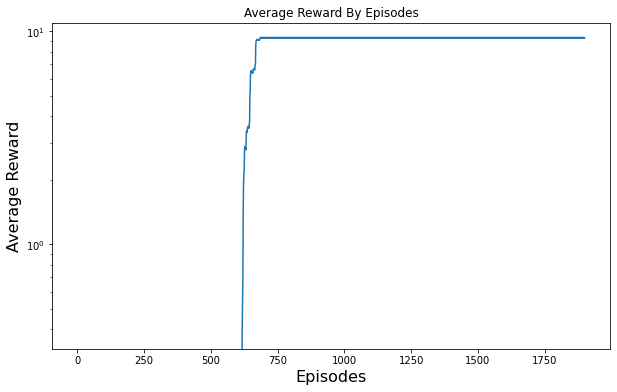

In [11]:
# 에피소드당 평균 보상 획득 그래프
f = plt.figure(figsize=(10,6))
plt.plot(np.arange(len(avg_rewards)), avg_rewards)

plt.title('Average Reward By Episodes')
plt.xlabel("Episodes", fontsize=16)
plt.ylabel('Average Reward',fontsize=16)
plt.yscale('log')
plt.show()

In [12]:
# 마지막 누적 보상을 ANSI 재현하기 위해서 추가함 
from IPython.display import clear_output
import time

state = env.reset()
done = False
steps = []
steps.append([env.render(mode='ansi'),0,"-"])
while not done:
    # action = agent.action_select(state)
    action = agent.action_greedy(state)
    state, reward, done, _ = env.step(action)
    steps.append([env.render(mode='ansi'), reward, action])

In [13]:
def render_replay(steps):
    cum_reward = 0
    for step in steps:
        clear_output(wait=True)
        cum_reward += step[1]
        print("{} \n액션: {}\n보상: {}\n누적 평균 보상: {}".format(step[0], step[2], step[1], cum_reward))
        time.sleep(0.6)

In [14]:
render_replay(steps)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
 
액션: 5
보상: 20
누적 평균 보상: 13


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 135 kB/s 


In [23]:
import base64, io

# 코랩 비디오 레코딩 라이브러리
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display 
import glob

# 구글 코랩 드라이브 마운트 후 video 폴더를 생성한후 해당 펑션 콜하면 됨
def show_video(env_name):
    mp4list = glob.glob('/content/gdrive/MyDrive/video/*.mp4')
    if len(mp4list) > 0:
        mp4 = '/content/gdrive/MyDrive/video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

# 구글 코랩 드라이브 마운트 후 video 폴더를 생성한후 해당 펑션 콜하면 됨
def show_video_of_model(env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="/content/gdrive/MyDrive/video/{}.mp4".format(env_name))
    state = env.reset()
    done = False
    while not done:
        vid.capture_frame()
        action = agent.action_greedy(state)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        if done:
            break        
    env.close()

In [24]:
#마지막 상태의 택시 저장
show_video_of_model("Taxi-v3")

In [25]:
#택시 보여주기
show_video("Taxi-v3")